# Übungen SW 4

In [ ]:
# 4.1 a) 
import scipy.stats as st
import matplotlib.pyplot as plt

data = [71, 69, 67, 68, 73, 72, 71, 71, 68, 72, 69, 72]
st.probplot(data, plot=plt)
plt.show()

# Daten folgen ungefähr der Linie, also ist eine Normalverteilung gerechtfertigt. 
# Datenmenge ist klein, also ist die Aussagekraft des QQ-Plots begrenzt.

In [9]:
# 4.1 b) 
lower   = 0  # Untere Grenze
upper   = 80  # Obere Grenze


In [ ]:
# 4.1 c) 

import pymc as pm
import arviz as az 
import scipy.stats as st 
import numpy as np

data    = np.array([71, 69, 67, 68, 73, 72, 71, 71, 68, 72, 69, 72]) # Gemessene Daten
sigma   = 1.5


with pm.Model() as model:
    mu = pm.Uniform('mu', lower=lower, upper=upper)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace = pm.sample(1000)
az.plot_posterior(trace, point_estimate='mean', hdi_prob=0.94)

# HDI = [69,71]
# Mittelwert = 70

In [ ]:
# 4.1 d) 

# Standardabweichung geschätzt aus Daten statt gegeben. 

import pymc as pm
import arviz as az 
import scipy.stats as st 
import numpy as np

data    = np.array([71, 69, 67, 68, 73, 72, 71, 71, 68, 72, 69, 72]) # Gemessene Daten
sigma   = data.std() # schätzung aus Daten --> 1.8

with pm.Model() as model:
    mu = pm.Uniform('mu', lower=lower, upper=upper)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace = pm.sample(1000)
az.plot_posterior(trace, point_estimate='mean', hdi_prob=0.94)

# HDI = [69,71]
# Mittelwert = 70 
# --> identisch zu Bsp. c)

In [ ]:
# Aufgabe 4.3 b)) 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

data_a = np.array([120, 265, 157, 187, 219, 288, 156, 205, 163])
data_b = np.array([127, 281, 160, 185, 220, 298, 167, 203, 171])
data = data_a - data_b

st.probplot(data, plot=plt)
plt.show()

In [ ]:
import pymc as pm
import arviz as az
import numpy as np

data = data_a - data_b
sigma = 6.2

with pm.Model() as model:
    delta = pm.Uniform('delta', lower=-20, upper=20)
    y = pm.Normal('y', mu=delta, sigma=sigma, observed=data)
    trace = pm.sample(1000)
az.plot_posterior(trace, point_estimate='mean', hdi_prob=0.94)

In [ ]:
# Aufgabe 4.4 b) 
import numpy as np
data_m = np.array([120, 107, 110, 116, 114, 111, 113, 117, 114, 112])
data_f = np.array([110, 111, 107, 108, 110, 105, 107, 106, 111, 111])

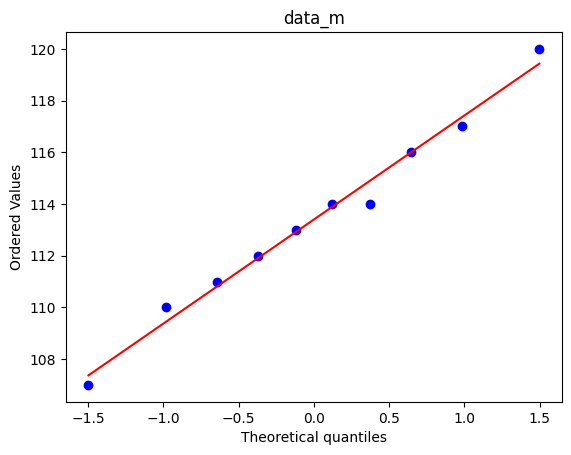

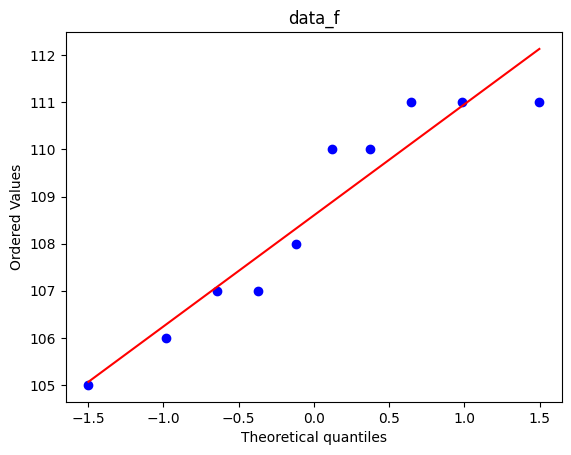

In [25]:
# Prüfen ob Normalverteilt
st.probplot(data_m,plot=plt)
plt.title('data_m')
plt.show()

st.probplot(data_f,plot=plt)
plt.title('data_f')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_1, mu_2]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


array([<Axes: title={'center': 'mu_1'}>, <Axes: title={'center': 'mu_2'}>],
      dtype=object)

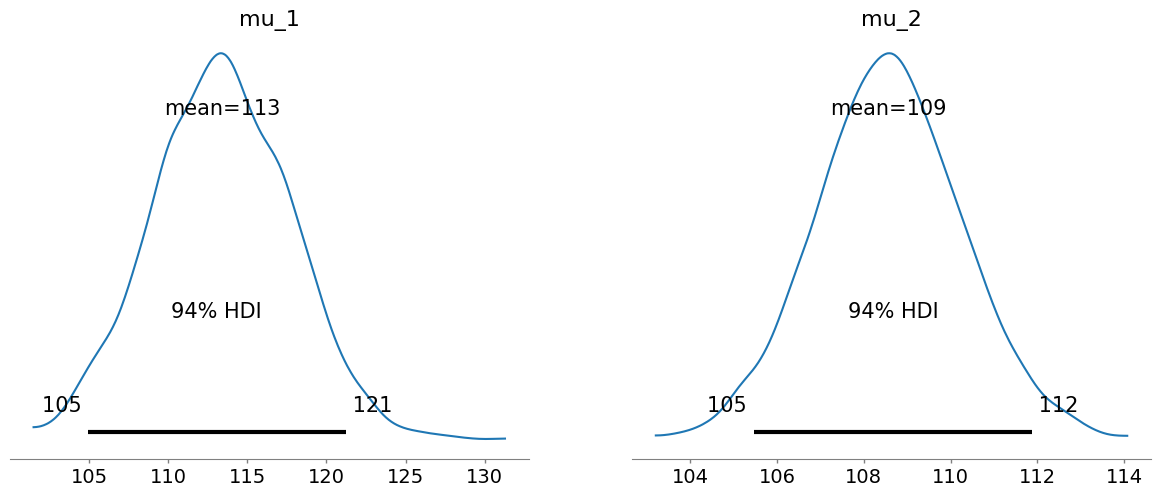

In [32]:
# Aufgabe 4.4 c)
np.array([data_m, data_f]).min() # --> min 105, max 120

lower = 90
upper = 130

sigma_m = 13.82 # Standardabweichung der männlichen Gruppe
sigma_f = 5.16 # Standardabweichung der weiblichen Gruppe

with pm.Model() as model_mul:
    mu_1 = pm.Uniform('mu_1', lower=100, upper=250)
    mu_2 = pm.Uniform('mu_2', lower=100, upper=250)
    y_f  = pm.Normal('y_f', mu=mu_1, sigma=sigma_m, observed=data_m)
    y_m  = pm.Normal('y_m', mu=mu_2, sigma=sigma_f, observed=data_f)
    trace= pm.sample(1000)

az.plot_posterior(trace)

In [33]:
# Ja, relevanter unterschied. Die beiden HDI zeigen keine Überlappung.

In [57]:
# Aufgabe 4.5) 
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas import Series

rind        = Series([186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132])
gefluegel   = Series([129, 132, 102, 106, 94, 102, 87, 99, 170, 113, 135, 142, 86, 143, 152, 146, 144])

# a) nich gepaart --> die einzelnen Werte habe keine Beziehung zueinander --> zwei unabhängige Gruppen

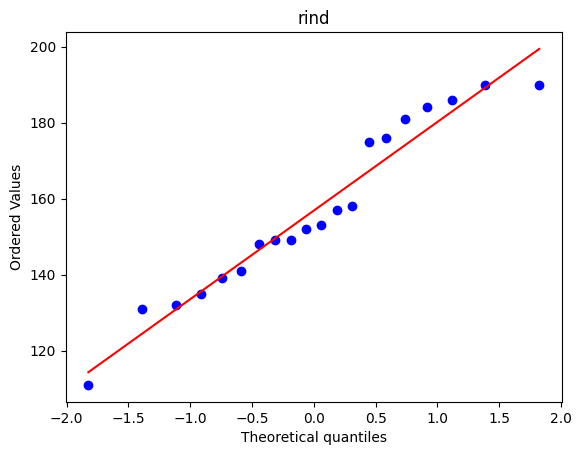

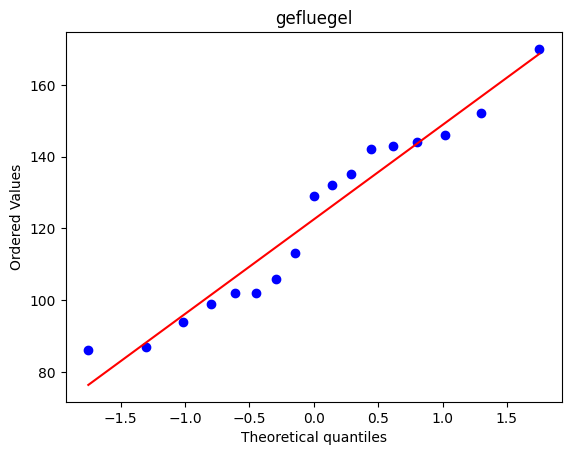

In [58]:
# b) prüfen ob Normalverteilt: 
st.probplot(rind,plot=plt)
plt.title("rind")
plt.show()

st.probplot(gefluegel,plot=plt)
plt.title("gefluegel")
plt.show()

# --> ja, beide folgen ungefähr einer Normalverteilung

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_1, mu_2]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


array([<Axes: title={'center': 'mu_1'}>, <Axes: title={'center': 'mu_2'}>],
      dtype=object)

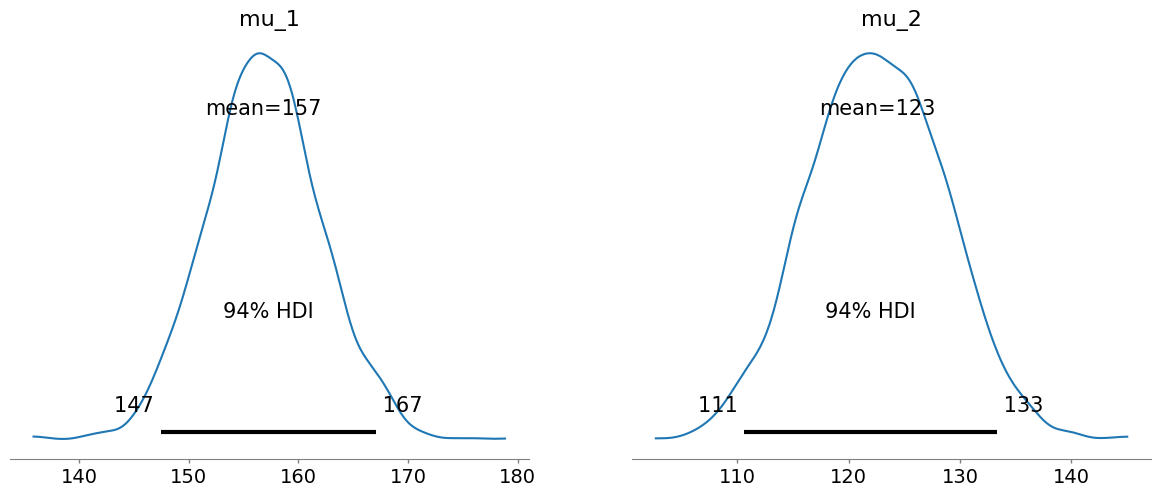

In [59]:
# Prior verteilung
sigma_rind      = rind.std()
sigma_gefluegel = gefluegel.std()

lower = 50
upper = 250

with pm.Model() as model_mul:
    mu_1 = pm.Uniform('mu_1', lower=100, upper=250)
    mu_2 = pm.Uniform('mu_2', lower=100, upper=250)
    y_f  = pm.Normal('y_f', mu=mu_1, sigma=sigma_rind, observed=rind)
    y_m  = pm.Normal('y_m', mu=mu_2, sigma=sigma_gefluegel, observed=gefluegel)
    trace= pm.sample(1000)

az.plot_posterior(trace)

# Antwort d/e: Ja, es gibt einen relevanten Unterschied zwischen den beiden Gruppen. Die beiden HDI zeigen keine Überlappung.

In [60]:
# Aufgabe 4.6
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas import Series

data_z = np.array([16.3, 12.7, 14.0, 53.3, 117, 62.6, 27.6])
data_b = np.array([10.4, 8.91, 11.7, 29.9, 46.3, 25.0, 29.4])
data = data_z - data_b

# mdma_zuerich = Series([16.3, 12.7, 14.0, 53.3, 117, 62.6, 27.6])
# mdma_basel = Series([10.4, 8.91, 11.7, 29.9, 46.3, 25.0, 29.4])
# d = mdma_zuerich - mdma_basel

# print(d.mean(), d.std())
# feststellung std series =! std numpy array

# a) mu und sigma
mu = data.mean()
sigma = data.std()
print(mu, sigma)

# b) gepaarte stichproben --> jeder Tag hat zwei Messwerte die miteinander korrelieren

20.27 24.323427272605198


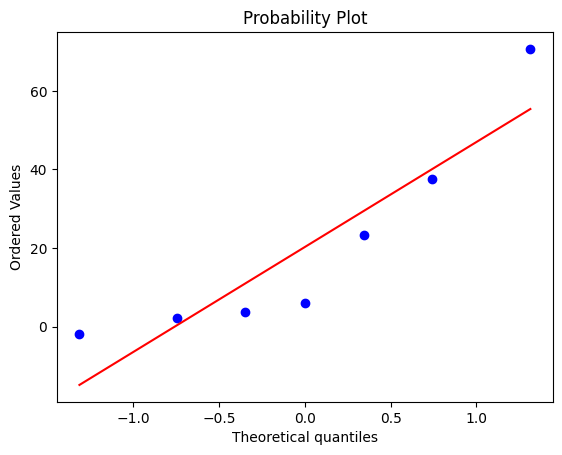

In [62]:
# c) prüfen ob normalverteilt
st.probplot(data,plot=plt)
plt.show()

# Daten folgen nicht einer Normalverteilung, da der Datensatz zu klein ist, ist die Aussagekraft des QQ-Plots begrenzt.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


<Axes: title={'center': 'mu'}>

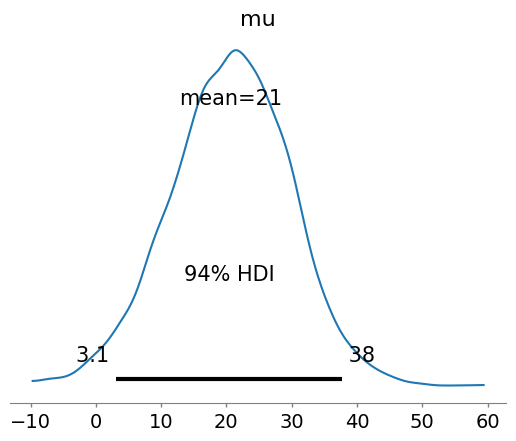

In [64]:
lower = -20
upper = 100

sigma = data.std()

with pm.Model() as model_paired:
    mu = pm.Uniform('mu', lower=lower, upper=upper)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace_paired = pm.sample(1000)

az.plot_posterior(trace_paired)